<a href="https://colab.research.google.com/github/khaledkhnissi/Machine_Learning/blob/main/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

4423680/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
60000
[9 0 0 ... 3 0 5]
10000
(10000, 28, 28)


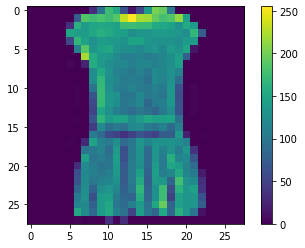

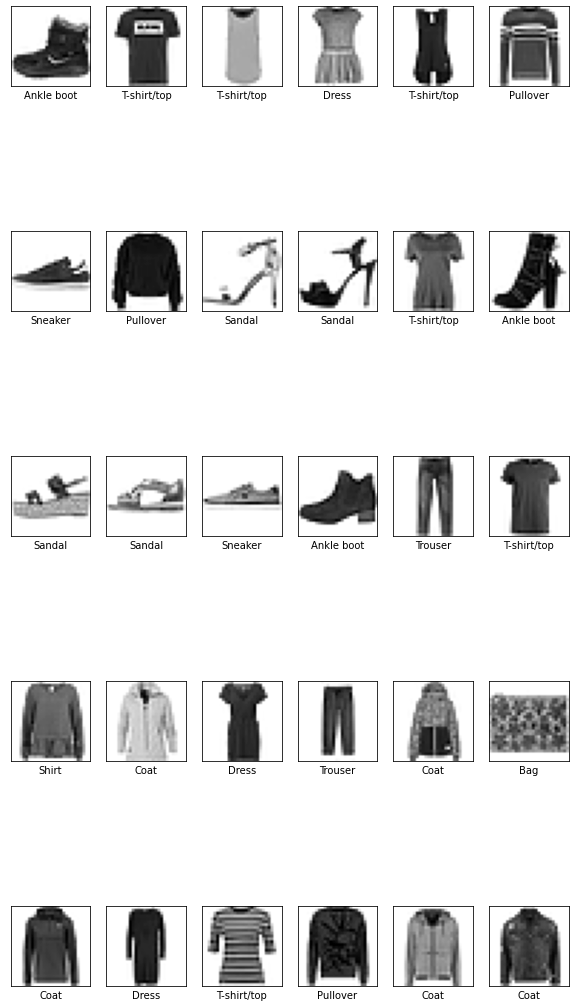

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
fashion_mnist=keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()
class_names=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
print(train_images.shape)
print(len(train_labels))
print(train_labels)
print(len(test_images))
print(test_images.shape)
plt.figure()
plt.imshow(train_images[3])
plt.colorbar()
plt.grid(False)
plt.show()
train_images=train_images/255.0
test_images=test_images/255.0
plt.figure(figsize=(10,20))
for i in range(30):
    plt.subplot(5,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()


In [4]:
model=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),#input layer reformat the data
    keras.layers.Dense(128,activation='relu'), #hidden layers
    keras.layers.Dense(10,activation='softmax')#output layer = number of classes
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(train_images,train_labels,epochs=10)        #epochs = number of classes
tes_loss,test_acc=model.evaluate(test_images,test_labels,verbose=2)#verbose for the visuability
print(('\nTest accuracy:',test_acc))

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/backend.py:4930: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


1875/1875 [==============================] - 4s 2ms/step - loss: 0.5025 - accuracy: 0.8239
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3815 - accuracy: 0.8614
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3412 - accuracy: 0.8756
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3151 - accuracy: 0.8841
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2970 - accuracy: 0.8914
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2824 - accuracy: 0.8962
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2699 - accuracy: 0.9001
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2598 - accuracy: 0.9041
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2496 - accuracy: 0.9069
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2403 - accurac

In [5]:
predictions=model.predict(test_images)
print("Predicting the class : ",np.argmax(predictions[0]))
print("Test label :",test_labels[0])

Predicting the class :  9
Test label : 9


In [7]:
probability_model=tf.keras.Sequential([model,tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)
predictions[0]

array([0.08535753, 0.08535753, 0.08535753, 0.08535753, 0.08535753,
       0.08536202, 0.08535753, 0.08549519, 0.08535754, 0.23164004],
      dtype=float32)

In [8]:
np.argmax(predictions[0])
test_labels[0]

9

In [15]:
def plot_image(i,predictions_array,true_label,img):
  true_label,img=true_label[i],img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img,cmap=plt.cm.binary)
  predicted_label=np.argmax(predictions_array)
  if predicted_label==true_label:
    color = 'blue'
  else:
    color = 'red'
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                       100*np.max(predictions_array),
                                       class_names[true_label],
                                       color=color))
  
def plot_value_array(i,predictions_array,true_label):
  true_label=true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot=plt.bar(range(10),predictions_array,color="#777777")
  plt.ylim([0,1])
  predicted_label=np.argmax(predictions_array)
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

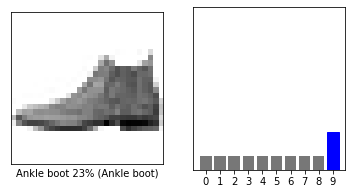

In [19]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions[i],test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions[i],test_labels)
plt.show()

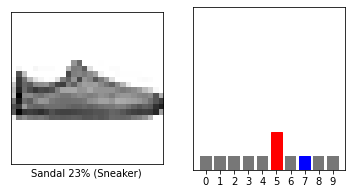

In [21]:
 i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions[i],test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions[i],test_labels)
plt.show()

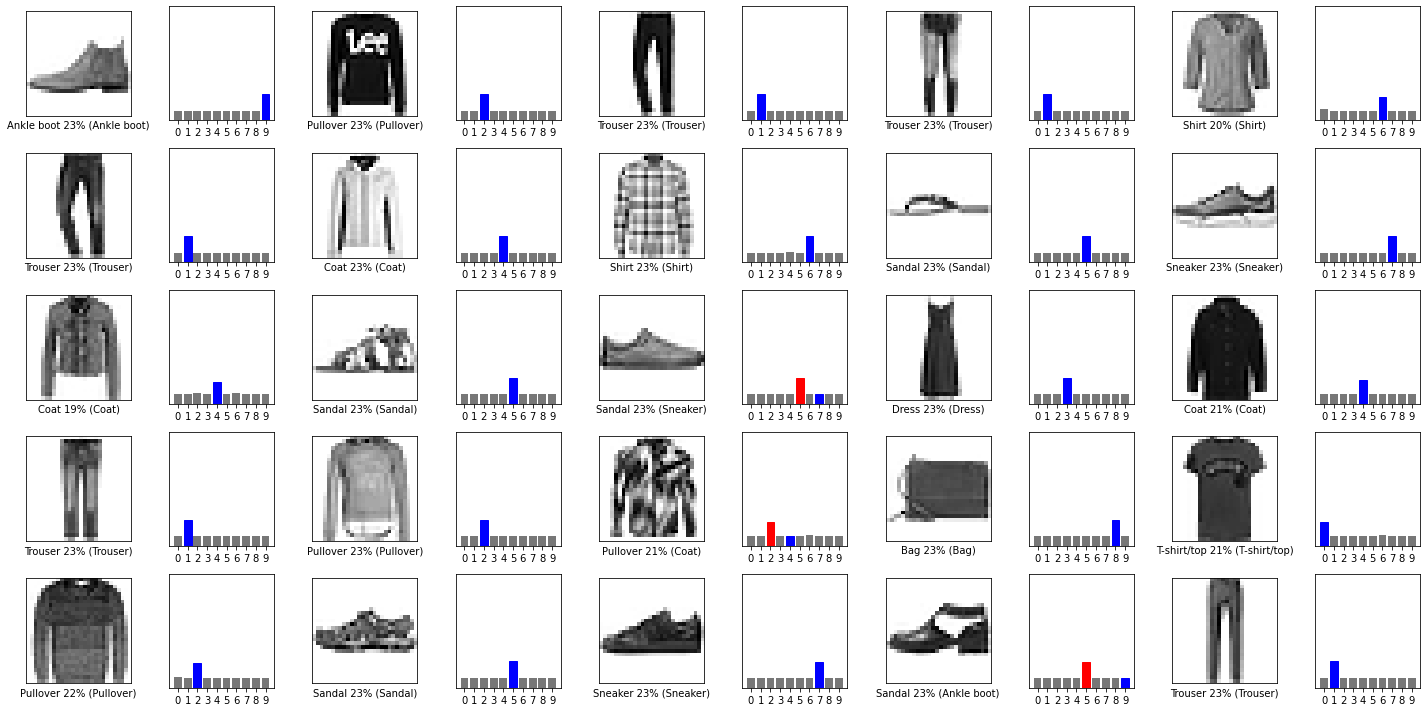

In [22]:
num_rows=5
num_cols=5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols,2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows,2*num_cols,2*i+1)
  plot_image(i,predictions[i],test_labels,test_images)
  plt.subplot(num_rows,2*num_cols,2*i+2)
  plot_value_array(i,predictions[i],test_labels)
plt.tight_layout()
plt.show()

In [25]:
img=test_images[1]
print(img.shape)
img = (np.expand_dims(img,0))
print(img.shape)

(28, 28)
(1, 28, 28)


In [26]:
predictions_single=probability_model.predict(img)
print(predictions_single)

[[0.08536579 0.08535788 0.23163451 0.08535788 0.08541279 0.08535788
  0.08543956 0.08535788 0.08535788 0.08535788]]


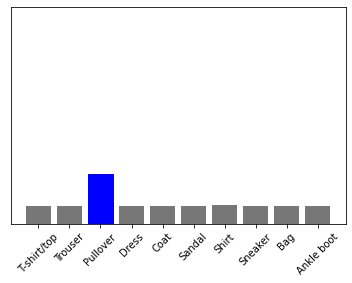

In [27]:
plot_value_array(1,predictions_single[0],test_labels)
_=plt.xticks(range(10),class_names,rotation=45)


In [28]:
np.argmax(predictions_single[0])

2